# **Prediction of Rice Production on Sumatera Island, Indonesia**

Pulau Sumatera mempunyai lebih dari 50 persen lahan pertanian di setiap provinsi dengan komoditas pangan utama yang paling dominan adalah beras, sedangkan komoditas minor lainnya adalah jagung, kacang tanah, dan ubi jalar. Hasil pertanian di Pulau Sumatera sangat rentan terhadap perubahan iklim dan dampak negatifnya dapat mempengaruhi pola tanam, waktu tanam, produksi dan kualitas hasil. Apalagi peningkatan suhu bumi akibat dampak pemanasan global yang akan mempengaruhi pola curah hujan, penguapan, limpasan air, kelembaban tanah, dan variasi iklim yang sangat berfluktuasi secara keseluruhan dapat mengancam keberhasilan produksi pertanian. .

Data tersebut merupakan catatan informasi terkait dari tahun 1993 hingga tahun 2020 yang meliputi 8 provinsi di Pulau Sumatera, yaitu Nanggroe Aceh Darussalam, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu dan Lampung.

# 1. Load Dataset

In [107]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor


In [3]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [4]:
#check row and column
data.shape

(224, 7)

Jumlah datanya sebanyak 224 yang mana untuk setiap provinsi mempunyai 28 data tahunan.

Kumpulan data terdiri dari atribut berikut:
1. **Provinsi**: Nama provinsi
2. **Tahun** : Tahun produksi beras
3. **Produksi** : Hasil produksi atau panen tahunan (ton)
4. **Luas Lahan**: Luas Pertanian (hektar)
5. **Curah Hujan**: Jumlah rata-rata curah hujan dalam setahun (milimeter)
6. **Kelembaban**: Tingkat kelembapan rata-rata dalam setahun (persentase)
7. **Suhu Rata-Rata** : Derajat suhu rata-rata dalam setahun (celsius)

Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


# 2. Exploratory Data Analysis

In [6]:
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [7]:
#overview statistics descriptive
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Rata-rata hasil panen di 8 provinsi selama 28 tahun sebanyak 1679700.887 ton dengan hasil terendah 42938 ton dan tertinggi 4881089 ton. Rata-rata luas lahan pertanian adalah 374.350 hektar.

Dari uraian data di atas terlihat bahwa nilai mean dan median setiap atribut tidak jauh berbeda. Jadi dapat dikatakan datanya berdistribusi normal.

In [11]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

# Menampilkan daftar nama kolom
print(data.columns)

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')


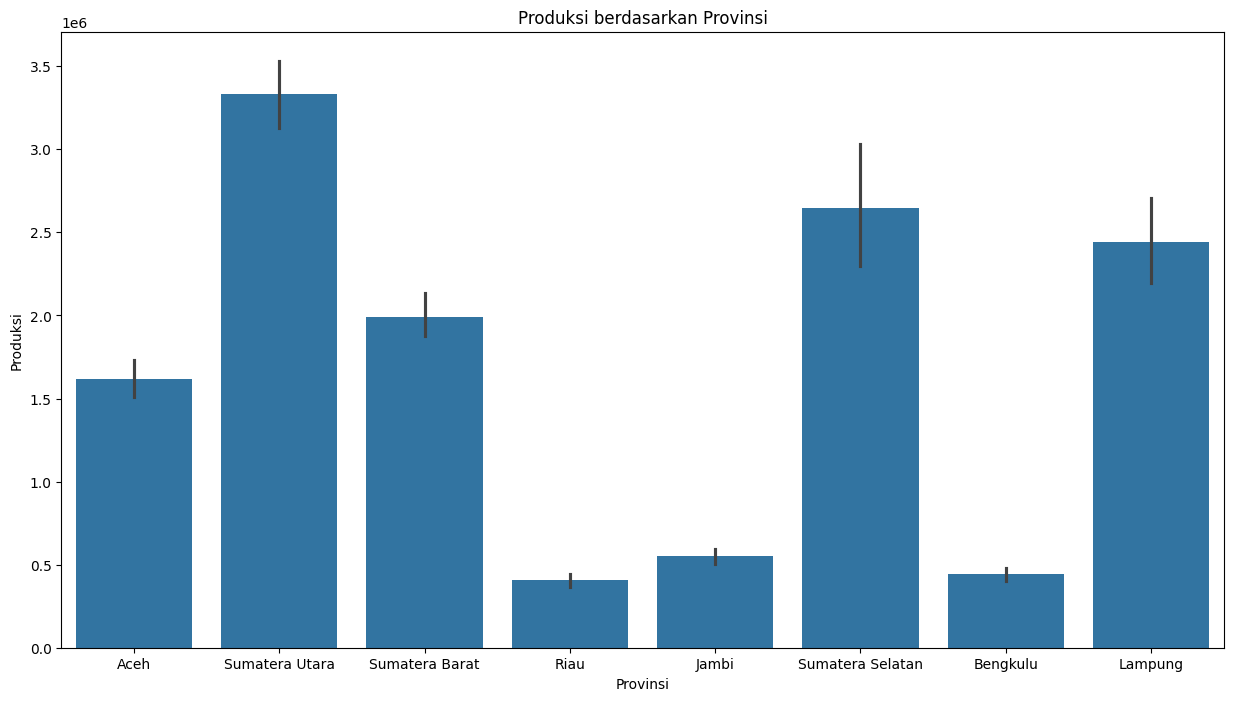

In [12]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Provinsi', y='Produksi', data=data)
plt.title('Produksi berdasarkan Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Produksi')
plt.show()

Sumatera Utara memiliki produksi hasil tertinggi dalam dataset.

In [13]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

C:\Users\user\AppData\Local\Temp\ipykernel_14036\659015857.py:1: FutureWarning: The provided callable <function mean at 0x0000015FCE0276D0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)


,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


In [18]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

# Menampilkan lima baris pertama dataset
print(data.head())


  Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu rata-rata  
0           26.06  
1           26.92  
2           26.27  
3           26.08  
4           26.31  


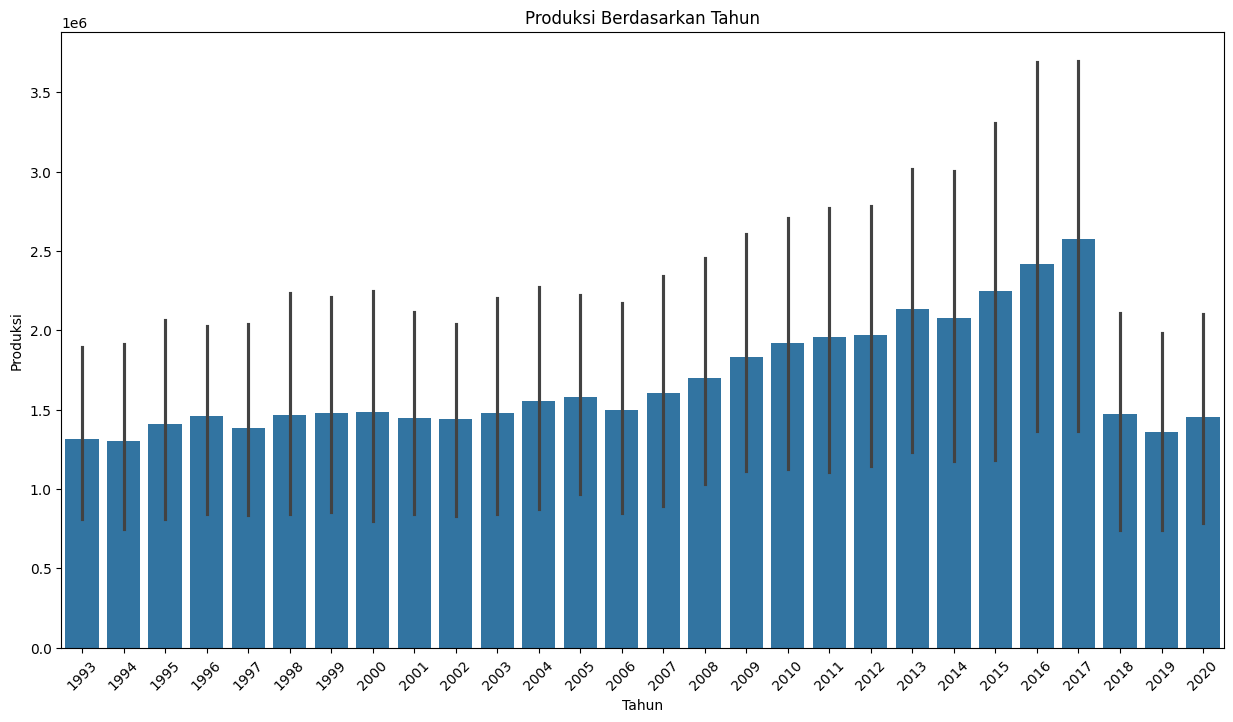

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Tahun', y='Produksi', data=data)
plt.xticks(rotation=45)
plt.title('Produksi Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.show()

Tahun dengan produksi terbesar terjadi pada tahun 2017, namun pada tahun-tahun berikutnya produksi mengalami penurunan yang cukup signifikan.

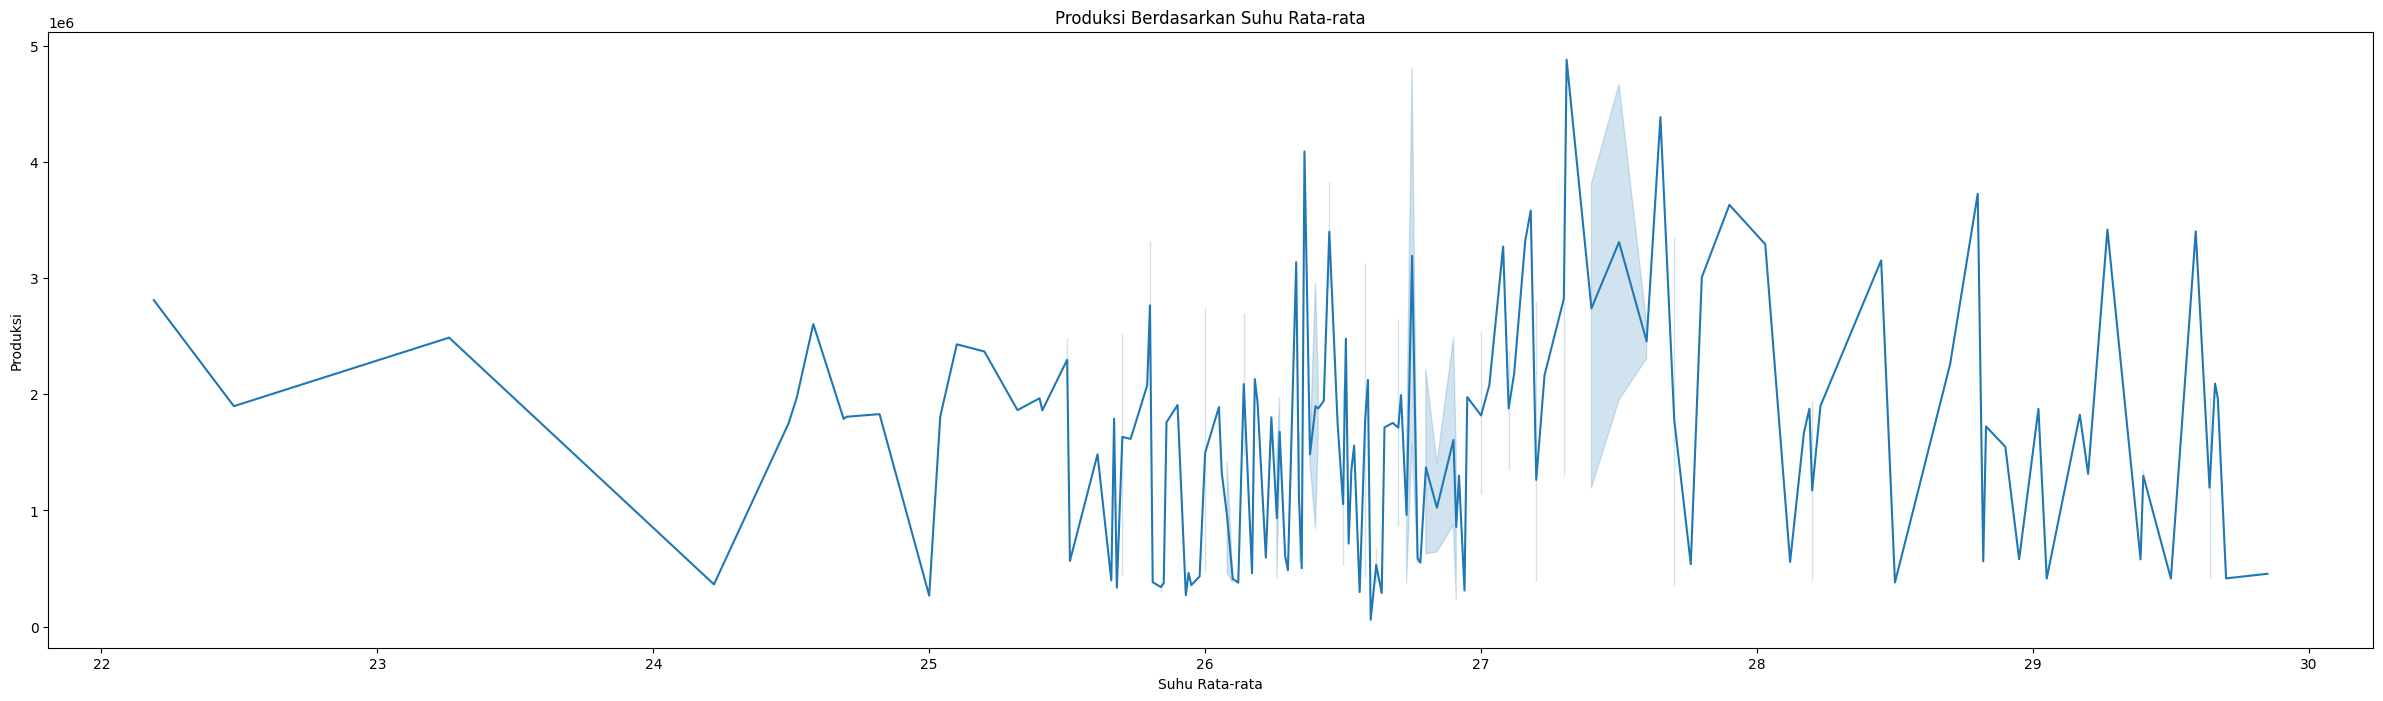

In [21]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Suhu rata-rata', y='Produksi', data=data)
plt.title('Produksi Berdasarkan Suhu Rata-rata')
plt.xlabel('Suhu Rata-rata')
plt.ylabel('Produksi')
plt.show()

Produksi maksimal terjadi pada saat suhu rata-rata berada pada kisaran 27-28 derajat Celcius.

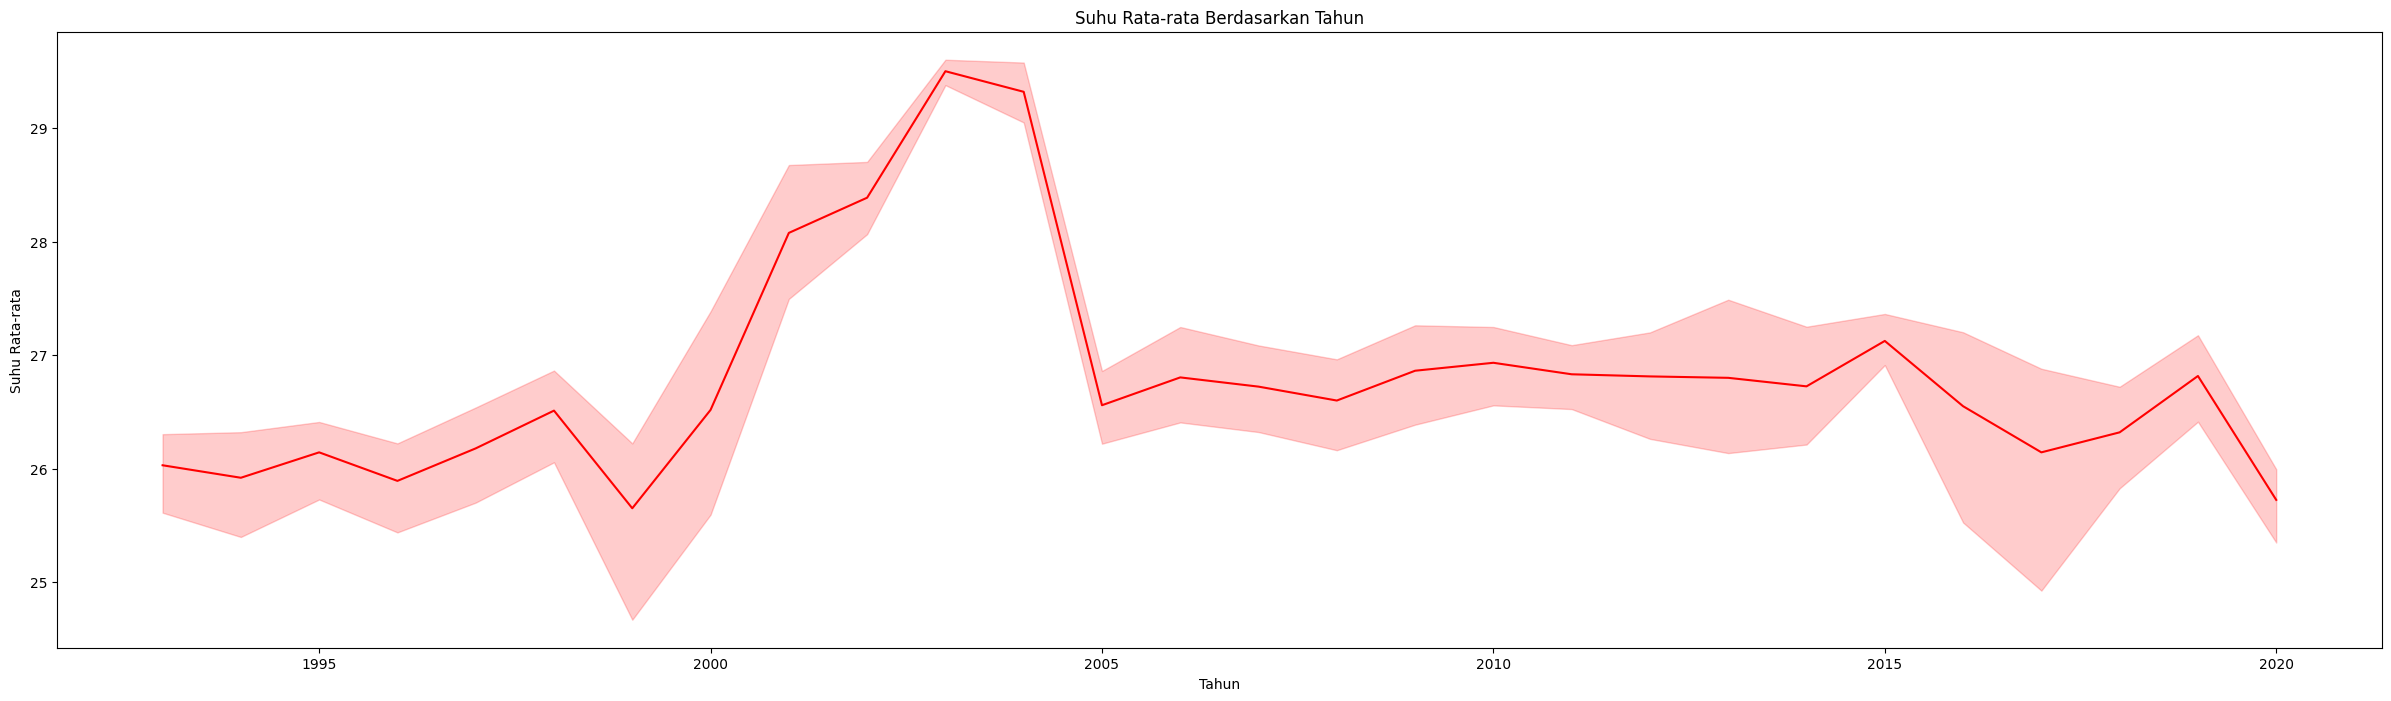

In [24]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Tahun', y='Suhu rata-rata', data=data, color='red')
plt.title('Suhu Rata-rata Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata')
plt.show()

Suhu rata-rata tertinggi yang pernah dicapai pada tahun 2000-2005 yaitu lebih dari 29 derajat Celcius, namun pada tahun-tahun berikutnya cenderung stabil pada kisaran suhu 27 derajat Celcius.

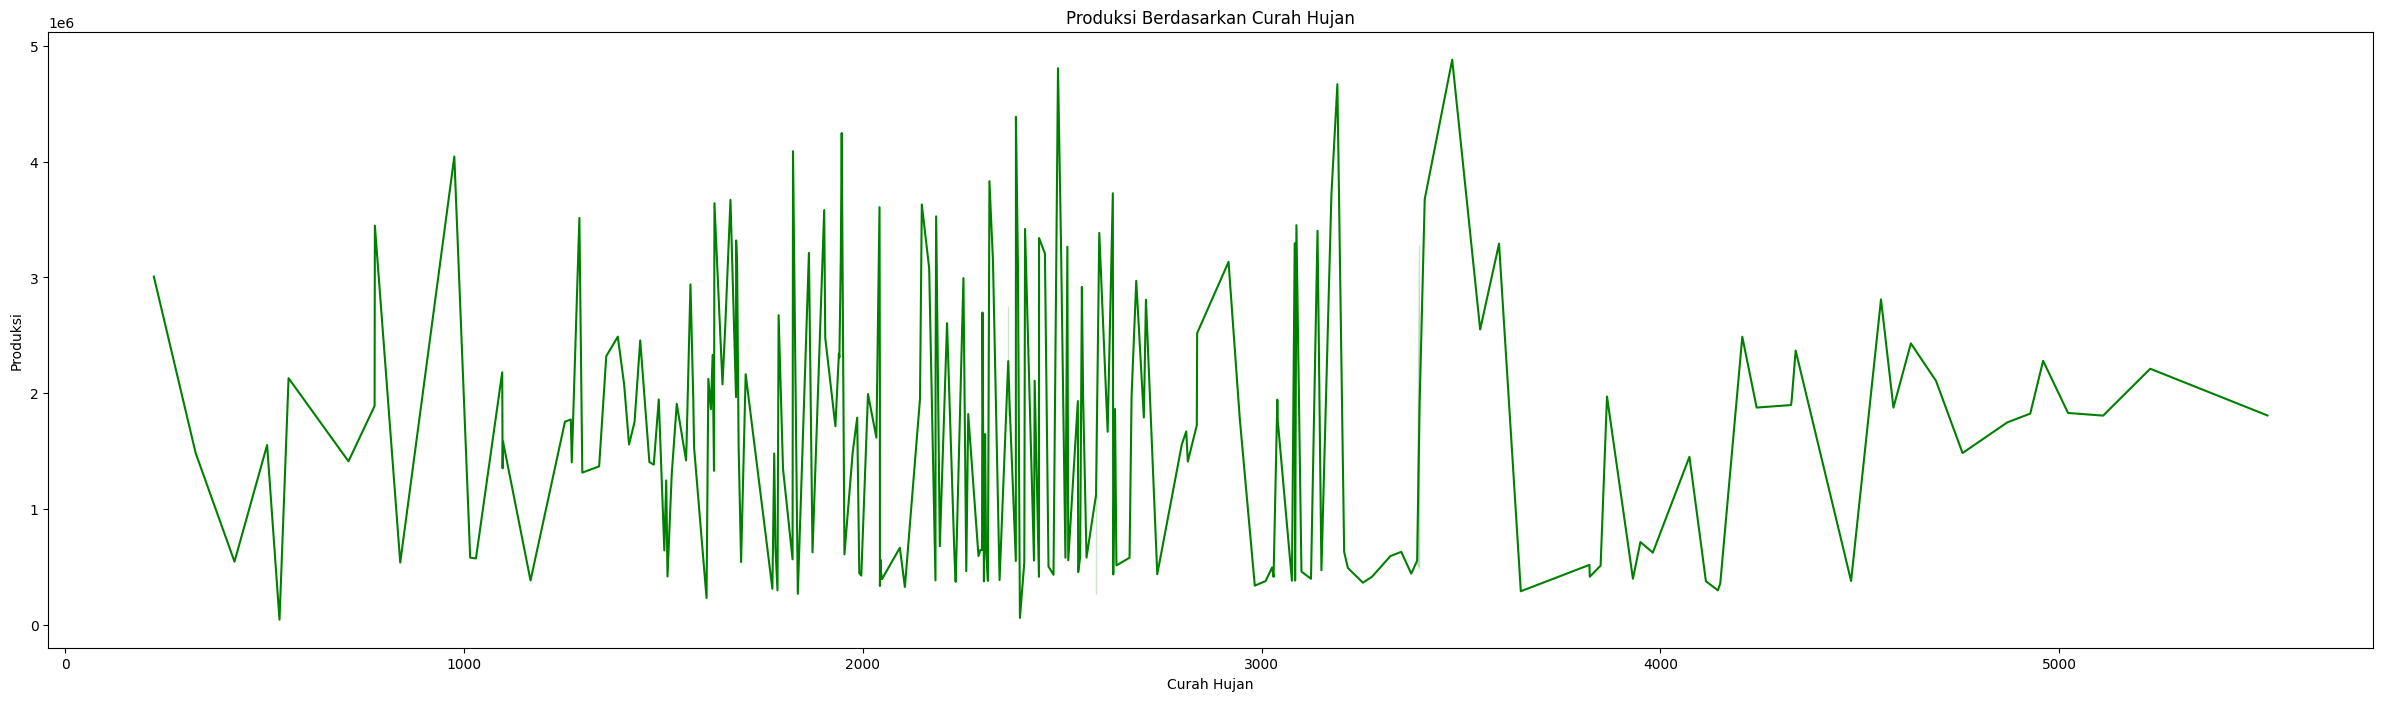

In [26]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Curah hujan', y='Produksi', data=data, color='green')
plt.title('Produksi Berdasarkan Curah Hujan')
plt.xlabel('Curah Hujan')
plt.ylabel('Produksi')
plt.show()


Dapat dikatakan bahwa produksi akan lebih stabil pada curah hujan sedang, yaitu sekitar 2500mm per tahun.

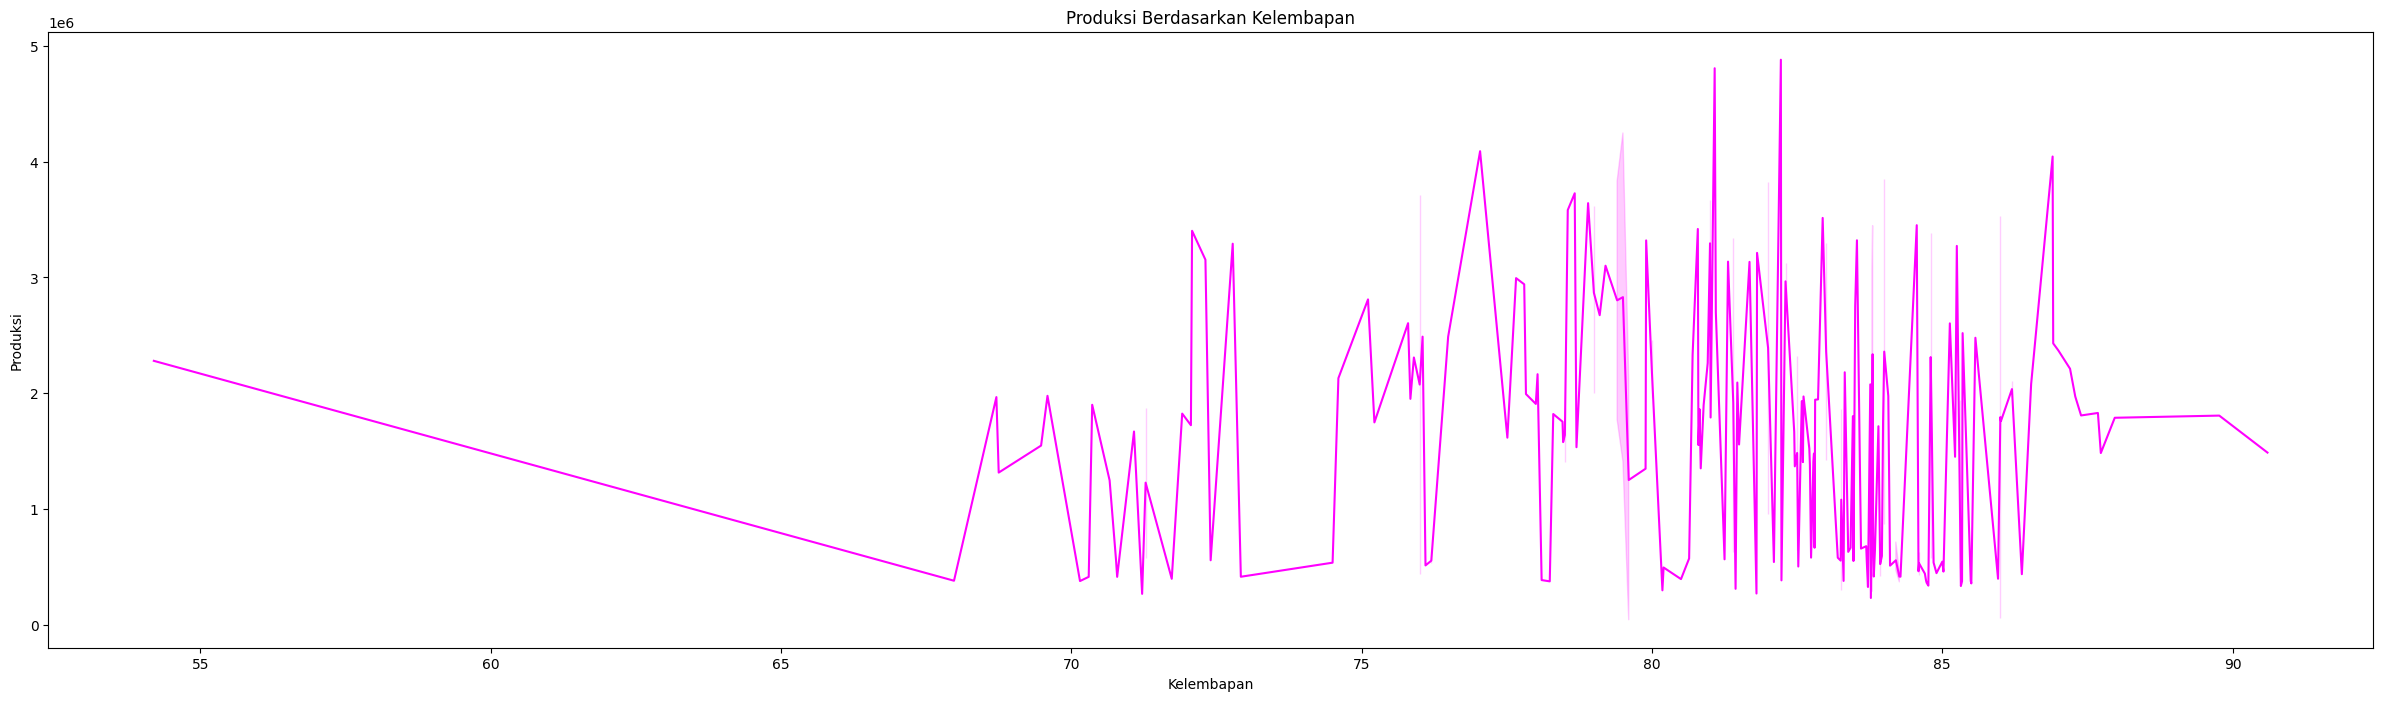

In [27]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Kelembapan', y='Produksi', data=data, color='magenta')
plt.title('Produksi Berdasarkan Kelembapan')
plt.xlabel('Kelembapan')
plt.ylabel('Produksi')
plt.show()

Pada tingkat kelembapan sekitar 80-85%, produksi terlihat lebih optimal dan stabil.

Based on the purpose of this notebook, the attribute that will be the output is the harvest (column = Production).

**a. Distribution of production quantities**

In [28]:
#statistical plot
import scipy.stats as stats
import pylab as py

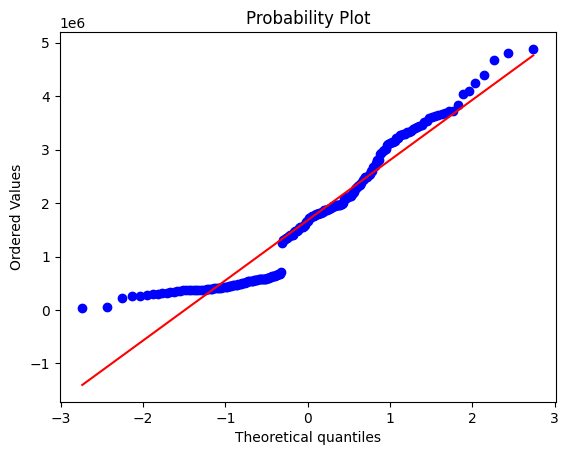

In [31]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

Plot QQ di atas menunjukkan bagaimana data didistribusikan dari variabel yang dipilih, yaitu variabel **Produksi**. Plot di atas merupakan plot nilai kuantil teoritis dengan nilai kuantil variabel yang dipilih. Jadi, plot tersebut akan menggambarkan berapa banyak nilai dalam suatu distribusi yang berada di atas atau di bawah batas tertentu. Dari hasil plot di atas diperoleh garis-garisnya cenderung lurus yang artinya secara keseluruhan sebaran data variabel-variabel tersebut cenderung normal.

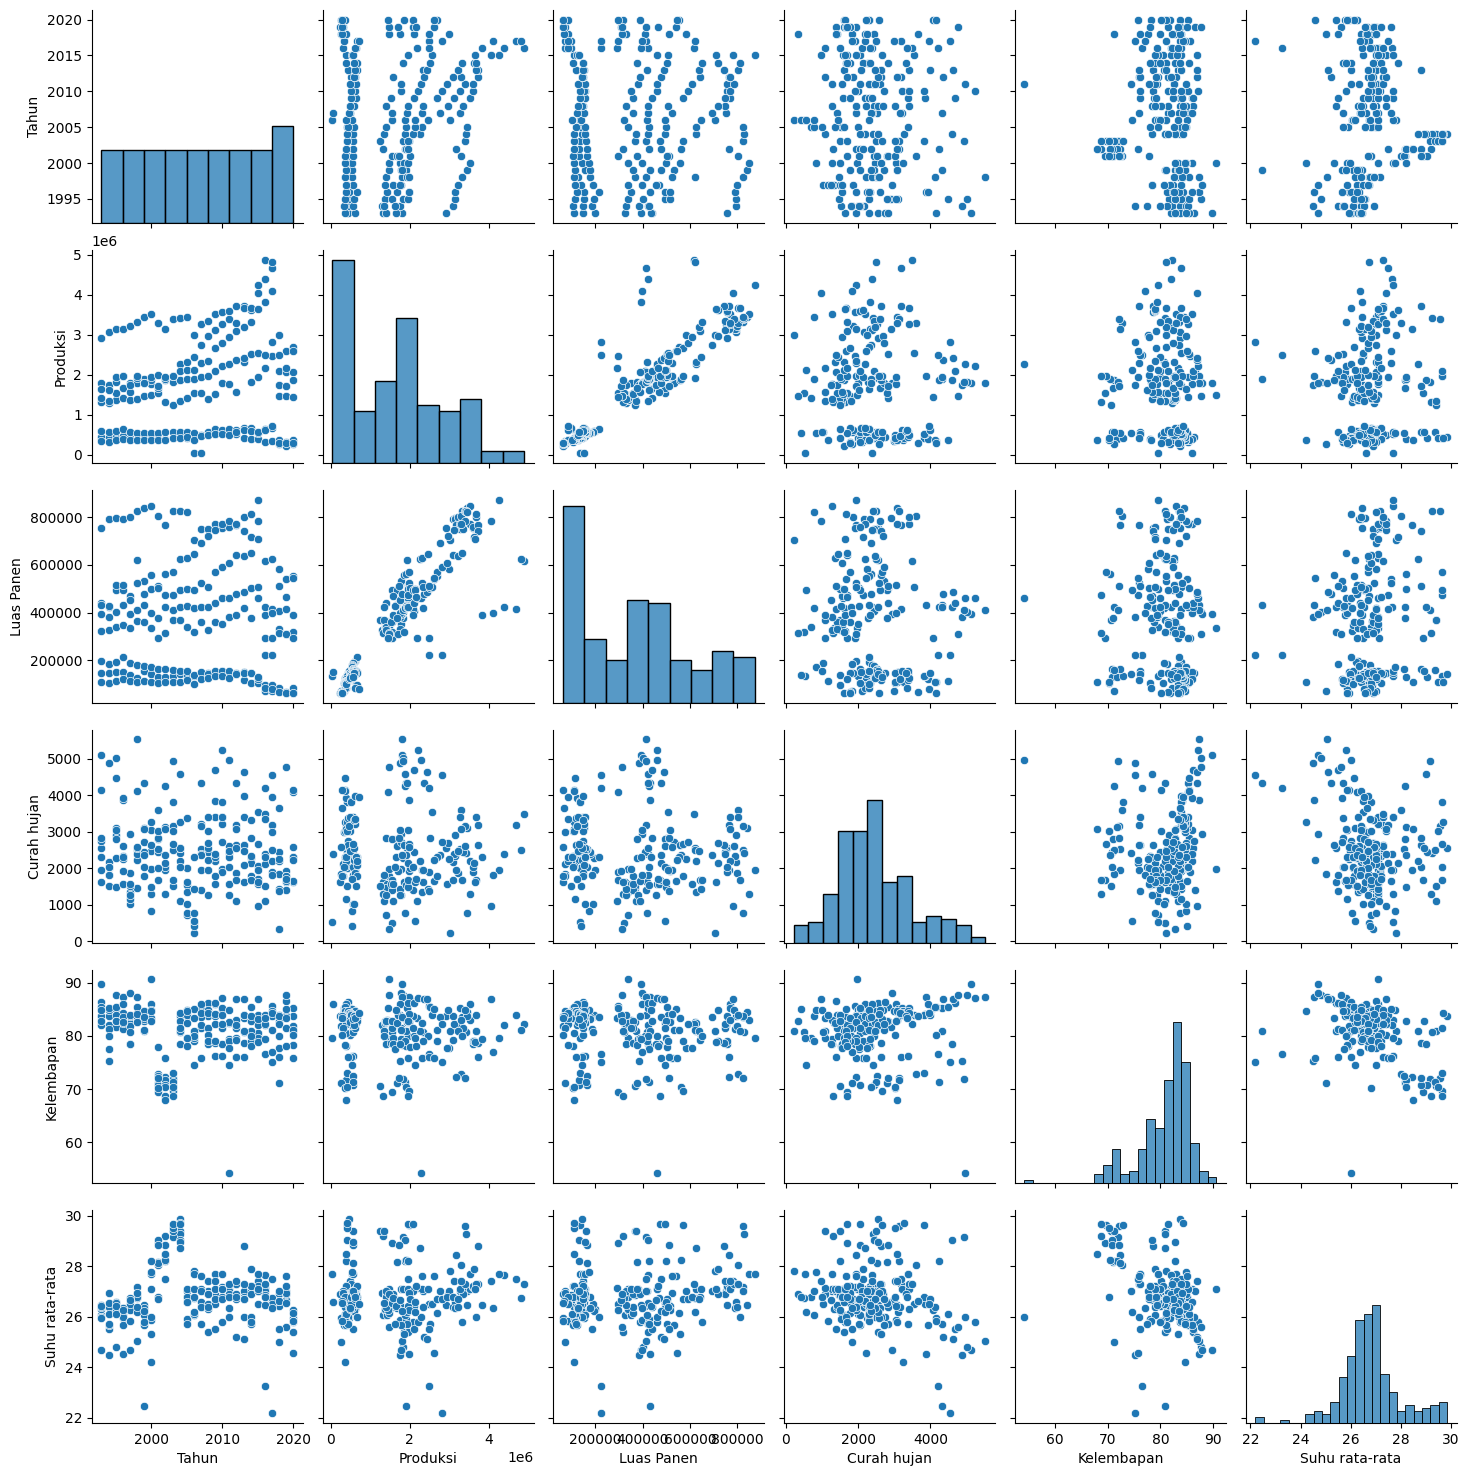

In [32]:
sns.pairplot(data)

**b. Checking the Outlier**

<Axes: >

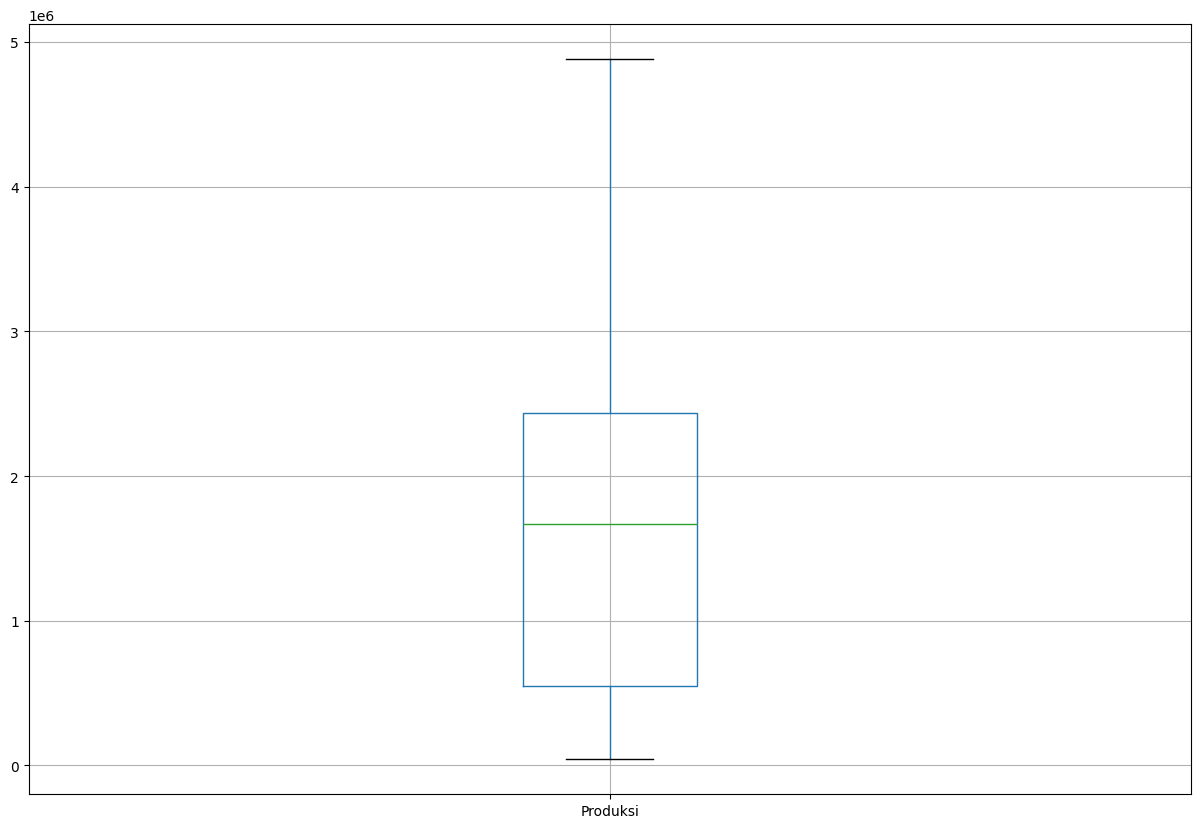

In [34]:
data[['Produksi']].boxplot(figsize=(15,10))

From the results of the vertical boxplot visualization above, it can be seen that there are no outliers from the output variable, **Production**.

**c. Correlation Matrix between numerical variables**

In [35]:
data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [36]:
#change the column order
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


Note:
- Correlation >= 0.5 there is a coherent relationship between variables
- Correlation < 0.5 there is no close relationship between variables

In [39]:
# Contoh menggunakan label encoding untuk kolom 'Provinsi'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Provinsi'] = le.fit_transform(df['Provinsi'])


In [40]:
correlation_matrix = df.corr()


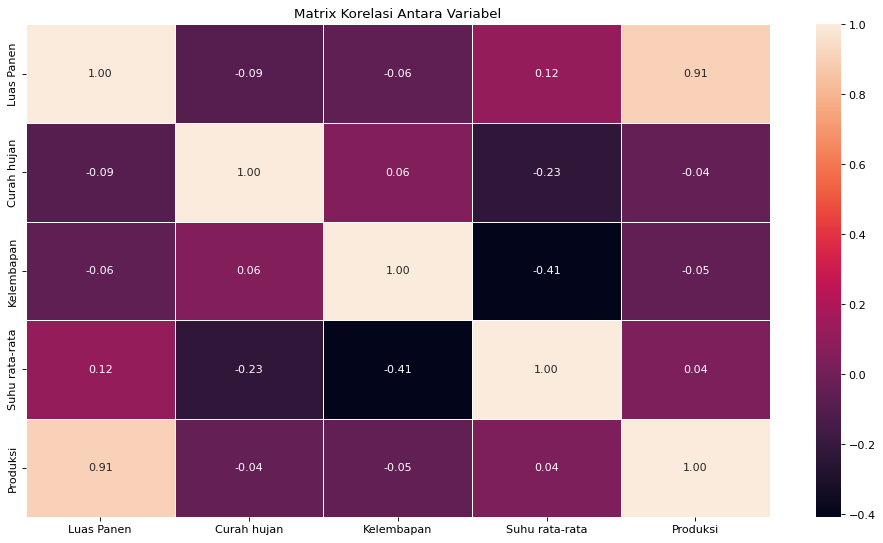

In [45]:
selected_columns = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata', 'Produksi']
kolom_corr = df[selected_columns]

fig, ax = plt.subplots(figsize=(15, 8), dpi=80)
sns.heatmap(kolom_corr.corr(), cmap='rocket', annot=True, fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Matrix Korelasi Antara Variabel')
plt.show()

Dari matriks korelasi dapat diketahui jenis korelasi antara variabel independen dengan variabel output.

Luas lahan pertanian dan suhu rata-rata mempunyai nilai korelasi positif, artinya semakin besar nilai variabel bebas tersebut maka produksi juga akan meningkat walaupun tidak signifikan (pengaruh suhu).

Sedangkan variabel curah hujan dan kelembaban mempunyai nilai korelasi negatif yang berarti semakin kecil kedua variabel tersebut maka produksi akan meningkat (pergerakan grafiknya bergerak terbalik), meskipun hubungannya tidak terlalu kuat.

# 3. Data Preprocessing (Feature Engineering)

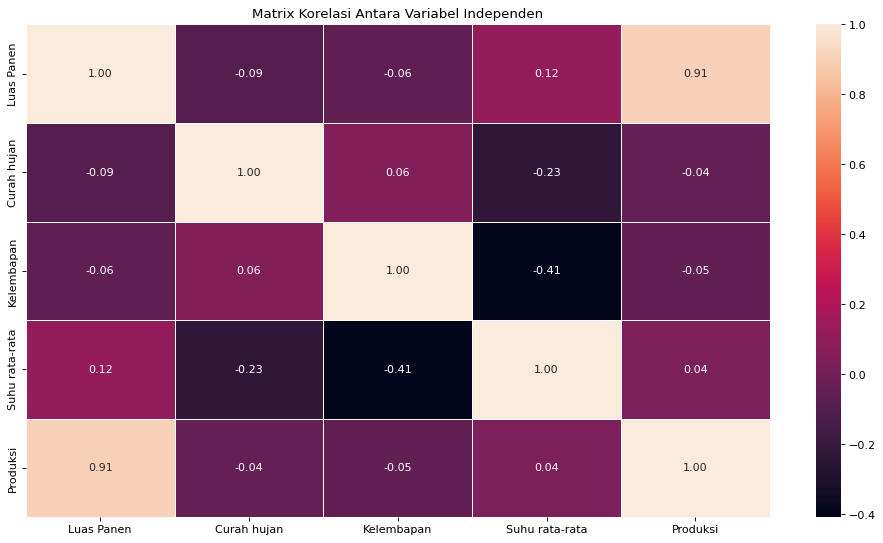

In [47]:
kolom_independen = ['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata', 'Produksi']
kolom_corr = df[kolom_independen]

fig, ax = plt.subplots(figsize=(15, 8), dpi=80)
sns.heatmap(kolom_corr.corr(), cmap='rocket', annot=True, fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Matrix Korelasi Antara Variabel Independen')
plt.show()

**Multicollinearit**y is a situation that indicates a strong correlation or relationship between two or more independent variables in a regression model which will affect the stability and accuracy of the model. One way to detect the existence of multicollinearity in the regression model is by looking at the strength of the correlation between the independent variables. If there is a correlation between the independent variables > 0.8 it can indicate the presence of multicollinearity.

So, from the matrix above it can be concluded that there is no multicollinearity found.

## Feature Encoding

In [48]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_0,Provinsi_1,Provinsi_2,Provinsi_3,Provinsi_4,Provinsi_5,Provinsi_6,Provinsi_7
0,1993,1329536.0,323589.0,1627.0,82.00,26.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,1299699.0,329041.0,1521.0,82.12,26.92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,1382905.0,339253.0,1476.0,82.72,26.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,1419128.0,348223.0,1557.0,83.00,26.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,1368074.0,337561.0,1339.0,82.46,26.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [51]:
df = df.drop(columns='Tahun')
df.tail()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_0,Provinsi_1,Provinsi_2,Provinsi_3,Provinsi_4,Provinsi_5,Provinsi_6,Provinsi_7
219,3831923.00,390799.00,2317.6,79.40,26.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,4090654.00,396559.00,1825.1,77.04,26.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,2488641.91,511940.93,1385.8,76.05,25.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,2164089.33,464103.42,1706.4,78.03,27.23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,2604913.29,545149.05,2211.3,75.80,24.58,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

## Train and Test Split

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [54]:
x_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_0,Provinsi_1,Provinsi_2,Provinsi_3,Provinsi_4,Provinsi_5,Provinsi_6,Provinsi_7
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


## Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -4.05190208e-01,
        -3.72405869e-01,  2.76887462e+00, -3.72405869e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01,  2.46797672e+00,
        -3.72405869e-01, -3.61157559e-01, -3.72405869e-01],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03,  2.76887462e+00, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -4.05190208e-01,
        -3.72405869e-01, -3.61157559e-01, -3.72405869e-01],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00, -3.61157559e-01, -4.05190208e-01,
         2.60768096e+00, -3.61157559e-01, -4.05190208e-01,
        -3.72405869e-01, -3.61157559e-01, -3.72405869e-01],
       [-1.05176751e+00, -2.70812770e-01,  7.4046415

In [57]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [58]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [59]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [ ]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551

  -0.36514837 -0.4152274  -0.31108551  2.56038192 -0.4152274  -0.39056673]

 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551

  -0.36514837  2.40831892 -0.31108551 -0.39056673 -0.4152274  -0.39056673]

 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025

  -0.36514837 -0.4152274  -0.31108551 -0.39056673 -0.4152274  -0.39056673]

 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551

   2.73861279 -0.4152274  -0.31108551 -0.39056673 -0.4152274  -0.39056673]

 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025

  -0.36514837 -0.4152274  -0.31108551 -0.39056673 -0.4152274  -0.39056673]]

[[-1.11263695]

 [ 0.26419173]

 [-1.19391204]

 [-0.88288197]

 [-1.07069477]]


# 4. Modeling

In [60]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Linear Regression

Linear Regression is an algorithm for regression modeling that is used to predict variable values based on the values of other variables.

In [61]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [62]:
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))   #do the inverse to return to the original value (because it was previously standardized)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


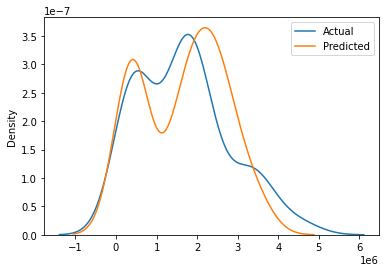

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [63]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524144 

The Average Cross Validation Score is 82.9


### Hyperparameter Tuning

In [64]:
LinReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11), 
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}

Best score is 0.8387472527255266


### Fit New Model

In [65]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [66]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,4.556448e+05
64,2.049707e+06
65,2.917382e+06
66,1.980058e+06
67,1.487799e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


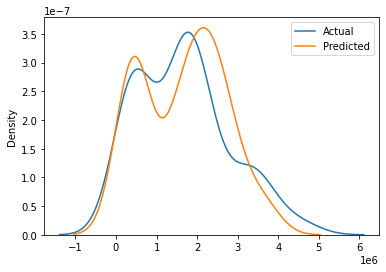

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [67]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  84.6508189494205
Test  :  86.89566591106708 

The Average Cross Validation Score is 83.0


The new model of Linear Regression has improved just a little bit after hyperparameter tuning.

## Random Forest Regression

Random Forest Regressor is an algorithm for regression modeling that is used to predict sustainable values.

In [68]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [69]:
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.490402e+05
64,1.875380e+06
65,2.600398e+06
66,1.951832e+06
67,2.114010e+06


C:\Users\user\AppData\Local\Temp\ipykernel_14036\1562972208.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
C:\Users\user\AppData\Local\Temp\ipykernel_14036\1562972208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

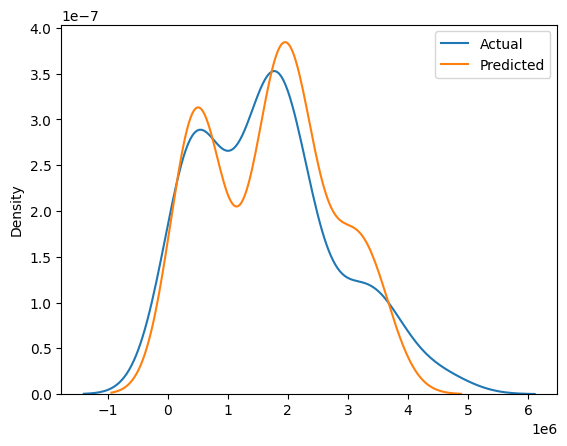

In [70]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [71]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionW

Train :  95.23971349396201
Test  :  85.48007246824575 

The Average Cross Validation Score is 83.81


### Hyperparameter Tuning

In [72]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#param_grid = {'bootstrap' : [True, False],
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': np.arange(100, 501)}             

#RFReg_tuning = RandomForestRegressor()

#RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

#RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
#print('Optimum parameters', RFReg_best_model.best_params_)
#print('Best score is {}'.format(RFReg_best_model.best_score_))

Optimum parameters {'n_estimators': 227, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}

Best score is 0.8431048700014612


### Fit New Model

In [73]:
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [74]:
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.374426e+05
64,1.874739e+06
65,2.709860e+06
66,1.895373e+06
67,2.136797e+06


C:\Users\user\AppData\Local\Temp\ipykernel_14036\1615958560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
C:\Users\user\AppData\Local\Temp\ipykernel_14036\1615958560.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

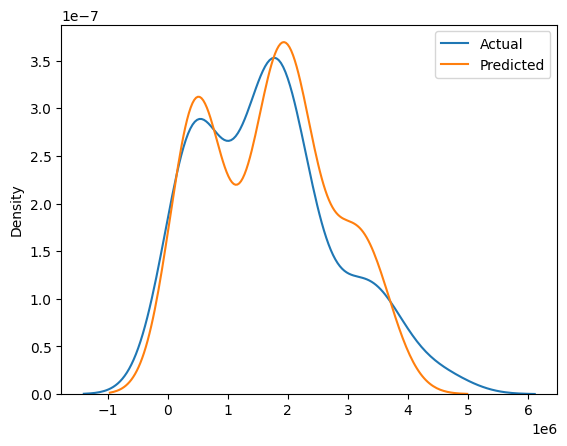

In [75]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [76]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100


#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  97.47517414251053
Test  :  86.37724010302279 

The Average Cross Validation Score is 83.0


Model Regresi Hutan Acak berkinerja lebih baik setelah menerapkan beberapa parameter yang disesuaikan.

## Gradient Boosting


Gradient Boosting Regressor memberikan model prediksi berupa kumpulan model prediksi lemah, yang biasanya berupa pohon keputusan.

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

In [78]:
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

,0
63,4.216658e+05
64,1.919787e+06
65,3.221704e+06
66,1.802274e+06
67,2.337136e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


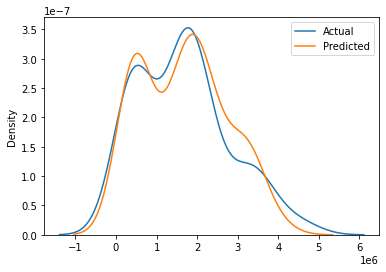

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [79]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_score)*100,2))

Gradient Boosting Regression


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

Train :  99.99976363346896
Test  :  85.98294460533783 

The Average Cross Validation Score is 83.25


### Hyperparameter Tuning

In [80]:
GBReg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#param_grid = {'subsample' : np.arange(0.1, 1.1),
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': [500, 1000, 2000],
#              'learning_rate': [0.001, 0.01, 0.1] }             

#GBReg_tuning = GradientBoostingRegressor()

#GBReg_search = RandomizedSearchCV(GBReg_tuning, param_grid, cv = 10, scoring='r2')

#GBReg_best_model = GBReg_search.fit(x_train, y_train.ravel())
#print('Optimum parameters', GBReg_best_model.best_params_)
#print('Best score is {}'.format(GBReg_best_model.best_score_))

Optimum parameters {'subsample': 0.1, 'n_estimators': 2000, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.01}

Best score is 0.800485268337298


### Fit New Model

In [81]:
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 2000, min_samples_split= 9, min_samples_leaf= 1, max_depth= 10, learning_rate= 0.01, random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=9,
                          n_estimators=2000, random_state=0, subsample=0.1)

In [82]:
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

,0
63,3.098038e+05
64,2.164963e+06
65,2.515733e+06
66,2.059401e+06
67,1.619067e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


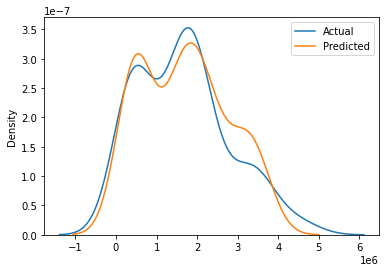

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_model_score)*100,2))

Gradient Boosting Regression


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Train :  91.60088806683848

Test  :  86.1771240862157 



The Average Cross Validation Score is 84.24


The new regression model with the gradient boosting algorithm has decreased their accuracy in the train data but increased in the test.

## Support Vector Regression

SVR gives the flexibility to define how much error is acceptable in model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In [83]:
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

SVR(gamma=1)

In [84]:
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

,0
63,1.086560e+06
64,1.757398e+06
65,1.915177e+06
66,1.690874e+06
67,1.815422e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


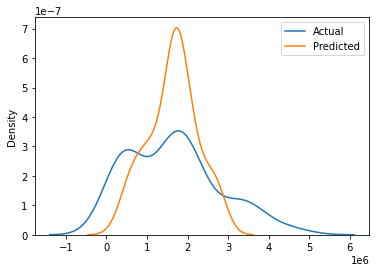

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [85]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_score)*100,2))

Support Vector Regression
Train :  92.62509041219276
Test  :  60.81422434326272 

The Average Cross Validation Score is -7.15


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

### Hyperparameter Tuning

In [86]:
SVReg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [87]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}             

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', SVReg_best_model.best_params_)
print('Best score is {}'.format(SVReg_best_model.best_score_))

Optimum parameters {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Best score is 0.8410602764707769


### Fit New Model

In [88]:
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

SVR(C=1, gamma=0.1)

In [89]:
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

,0
63,5.679776e+05
64,1.665946e+06
65,2.256916e+06
66,1.687524e+06
67,1.495696e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


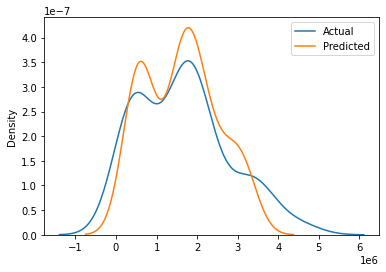

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_model_score)*100,2))

Support Vector Regression

Train :  87.44905125649251

Test  :  84.19387590969212 



The Average Cross Validation Score is -7.15


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

The support vector regression model has decreased their accuracy in the train data but increased in the test, which means overfitting has minimized.

## Decision Tree Regression

Decision Tree Regressor is an algorithm for building a regression model that observes the features of an object and trains the model in a tree structure.

In [93]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [94]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.256516e+05
64,1.916811e+06
65,1.826944e+06
66,1.827549e+06
67,2.392152e+06


C:\Users\user\AppData\Local\Temp\ipykernel_14036\626664663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
C:\Users\user\AppData\Local\Temp\ipykernel_14036\626664663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

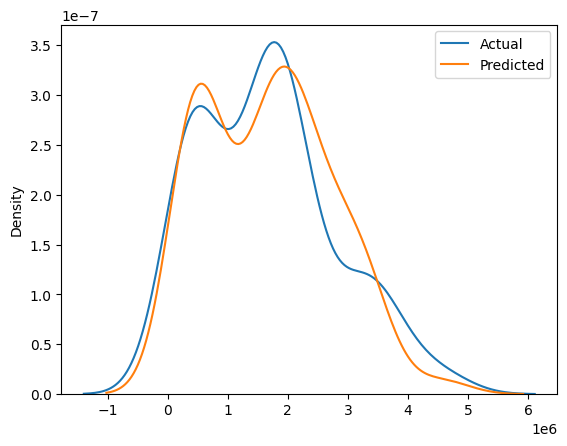

In [95]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [108]:
DTreeReg_model = DecisionTreeRegressor(
    splitter='best',
    min_samples_split=8,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=2,
    random_state=0
)


### Hyperparameter Tuning

In [96]:
DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
#param_grid = {'splitter' : ['best', 'random'],
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'max_features':['auto','log2','sqrt',None]}             

#DTreeReg_tuning = DecisionTreeRegressor()

#DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv = 10, scoring='r2')

#DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)
#print('Optimum parameters', DTreeReg_best_model.best_params_)
#print('Best score is {}'.format(DTreeReg_best_model.best_score_))

Optimum parameters {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 2}

Best score is 0.8275476584861492


### Fit New Model

In [99]:
DTreeReg_model = DecisionTreeRegressor(
    splitter='best',
    min_samples_split=8,
    min_samples_leaf=5,
    max_features=None,  # Menghilangkan parameter max_features atau set None
    max_depth=2,
    random_state=0
)


# 5. Model Evaluation

Evaluasi di bawah ini dilakukan dengan menggunakan mean absolute error, mean squared error, dan r2-score. Semakin kecil mean absolute error dan mean squared error, namun semakin besar skor R2 maka semakin baik algoritma tersebut.

1. Fungsi skor regresi skor R2 (koefisien determinasi) akan mewakili proporsi varians item (tanaman) dalam model regresi. Skor R2 menunjukkan seberapa cocok suku (titik data) dengan kurva atau garis.

2. Mean absolute error (MAE) mewakili rata-rata selisih absolut antara nilai aktual dan prediksi dalam kumpulan data. Ini mengukur rata-rata residu dalam kumpulan data.

3. Mean Squared Error (MSE) mewakili rata-rata selisih kuadrat antara nilai asli dan nilai prediksi dalam kumpulan data. Ini mengukur varians dari residu.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),ypred_DTreeReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_DTreeReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),ypred_DTreeReg_model)]
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228729
Random Forest,86.371017,225928.031064,178771866166.054901
K-Neighbors,86.286725,269658.437076,167644049255.577728
Gradient Boosting,86.177124,263584.160378,168983915511.552094
SVR,84.193876,284771.942122,193229017933.827148
Decision Tree,81.421643,281254.415963,227119415141.265686


Dari hasil yang terlihat di atas, model dengan algoritma Regresi Linier memiliki skor R2 tertinggi - 86,9%. Sehingga model ini dapat menjadi pilihan terbaik untuk digunakan dalam memprediksi produksi pertanian di Pulau Sumatera, sesuai dengan tujuan yang telah dijelaskan sebelumnya.